In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### the dataset comes from Kaggle competition - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
df = pd.read_csv('C:/Users/Michael/Downloads/python practice/house-prices-advanced-regression-techniques/train.csv')

## which columns are missing data?
## which columns have categorical data?
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
print(cols_with_missing)
categorical_col = [col for col in df.columns if df[col].dtypes == object]
print(categorical_col)

df.head()
df.columns


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

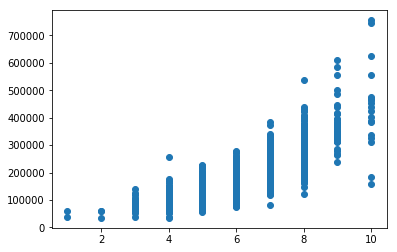

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [2]:
#exploratory analysis
## scatter plot to see correlation
plt.scatter(df.OverallQual, df.SalePrice)
plt.show()
## let's look at correlation between Sales Price(Y) and other variables(x1,x2,x3...)
df.corr().SalePrice.sort_values(ascending = False)


In [4]:
#Let's impute numerical variables using simple imputer - I used mean as the imputed value 
from sklearn.impute import SimpleImputer

numerical =  df.copy()
numerical = numerical.select_dtypes(exclude =['object'])
numerical_y = numerical['SalePrice']
numerical =numerical.drop(columns = ['SalePrice']) 
train_x,test_x,train_y,test_y = train_test_split(numerical,numerical_y, random_state = 0)
mean_imputer = SimpleImputer(strategy = 'mean')
train_x_imp = pd.DataFrame(mean_imputer.fit_transform(train_x))
test_x_imp = pd.DataFrame(mean_imputer.transform(test_x))
train_x_imp.columns = train_x.columns
test_x_imp.columns = test_x.columns

print(train_x_imp.shape)
print(test_x_imp.shape)

(1095, 37)
(365, 37)


In [8]:
# using linear regression model for prediction

from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(train_x_imp,train_y)
print(lin_model.score(train_x_imp,train_y))
#score is 0.84
print(lin_model.score(test_x_imp,test_y))
#score is 0.6874296721301451
pred_y = lin_model.predict(test_x_imp)
mean_absolute_error(test_y, pred_y)
#22690.23412953934


0.8448748014314907
0.6800672250178981


22690.735534269348

In [10]:
# Random Forrest yeilds much better result. Thus I will be using this model going forward 
rand_forrest = RandomForestRegressor(n_estimators = 200)
rand_forrest.fit(train_x_imp,train_y)
print(rand_forrest.score(train_x_imp,train_y))
# score is 0.978
print(rand_forrest.score(test_x_imp,test_y))
#score is 0.8463
forest_pred_y = rand_forrest.predict(test_x_imp)
mean_absolute_error(test_y, forest_pred_y)
#17584.46 

0.9790310446117856
0.8490688358695646


17453.6711369863

In [11]:
#label encoding the cardinal columns

##I first replaced NaNs with "NA", and then label encoded the values. 
## I did not use simple imputer here. Python showed me an error which said that there were values in the test set that wasnt present in the train set
## Thus I just mapped the values that needed to be changed.

from sklearn.preprocessing import LabelEncoder
labeled_column = ['ExterQual','HeatingQC','ExterCond','BsmtQual','BsmtCond','KitchenQual','GarageCond','GarageQual']

label = df.copy()
label = label[labeled_column]
label.isna().sum()
### it seems like there are nans in the dataset, let's fix that 
label = label.replace(np.nan,"NA",regex=True)
mapping = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
label = label.replace(mapping, regex=True)

train_x_labels,test_x_labels = train_test_split(label, random_state = 0)

# print(train_x_labels)
# print(test_x_labels)
train_x_labels.isna().sum()

ExterQual      0
HeatingQC      0
ExterCond      0
BsmtQual       0
BsmtCond       0
KitchenQual    0
GarageCond     0
GarageQual     0
dtype: int64

In [16]:
#Let's concat the two dataset so that we have (Numerica + Labeled) Data. Then, let's try using the randomforrest regressor

train_X = pd.concat([train_x_imp.reset_index(), train_x_labels.reset_index()], axis =1)
test_X = pd.concat([test_x_imp.reset_index(), test_x_labels.reset_index()], axis =1)

rand_forrest.fit(train_X,train_y)
print(rand_forrest.score(train_X,train_y))
#score is 0.98
print(rand_forrest.score(test_X,test_y))
#score is 0.85
pred_y_num_lab = rand_forrest.predict(test_X)
print(mean_absolute_error(test_y, pred_y_num_lab))
##### error is about 17213. 

0.9794129486301454
0.8535401439416053
17221.158835616436


In [17]:
#one-hot encoding the categorical columns
transform_columns = ['Utilities','Condition1','Condition2','BldgType','CentralAir']#,'Neighborhood']#,'SaleType'] -> these variables surprisingly increased error
df3 = df.copy()
df3 = df3[transform_columns]
df3 = df3.replace(np.nan,"NA",regex=True)
df3.isnull().sum() #check for missing variables

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

train_x_oh,test_x_oh = train_test_split(df3, random_state = 0)
train_x_OH = pd.DataFrame(OH_encoder.fit_transform(train_x_oh))
test_x_OH = pd.DataFrame(OH_encoder.transform(test_x_oh))
train_x_OH.index =  train_x_oh.index
test_x_OH.index = test_x_oh.index

print(train_x_OH.shape)
print(test_x_OH.shape)

train_X = pd.concat([train_X.reset_index(), train_x_OH.reset_index()], axis =1)
test_X = pd.concat([test_X.reset_index(), test_x_OH.reset_index()], axis =1)

(1095, 23)
(365, 23)


In [18]:
rand_forrest.fit(train_X,train_y)
print(rand_forrest.score(train_X,train_y))
print(rand_forrest.score(test_X,test_y))
#score is 0.8537365908978691
pred_y_num_lab = rand_forrest.predict(test_X)
print(mean_absolute_error(test_y, pred_y_num_lab))
##### error is about 17119. 

0.9797943879618499
0.8512027720177406
17119.59617808219


In [19]:
##based on the correlation I saw above, I deleted columns which were irrelevant
train_X =  train_X.drop(columns = ['index','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']) 
test_X =  test_X.drop(columns = ['index','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']) 



In [24]:
#then, random forrest modelling
rand_forrest2 = RandomForestRegressor(n_estimators = 1000)
rand_forrest2.fit(train_X,train_y)
print(rand_forrest2.score(train_X,train_y))
print(rand_forrest2.score(test_X,test_y))
#score is 0.8537365908978691
pred_y_num_lab = rand_forrest2.predict(test_X)
print(mean_absolute_error(test_y, pred_y_num_lab))
## the error is about 17030, so 100 cut

0.9797437233127235
0.8611347810214205
17049.836904109587


In [25]:
# Finally, let's use a different technique -XG Boosting 
from xgboost import XGBRegressor

# remember that XGB needs every column to be unique - concat may give me duplicates of columns 
my_model = XGBRegressor(n_estimators = 1000, learning_rate = 0.01, n_jobs = 5)
my_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X,test_y)],verbose=False)
print(my_model.score(train_X,train_y))
#score is 0.99
print(my_model.score(test_X,test_y))
#score is 0.8347365908978691
pred_y = my_model.predict(test_X)
print(mean_absolute_error(test_y, pred_y))
## the error is about 17070, so worse than the methods before

0.990670022233447
0.8409427637156476
17068.37557791096


In [26]:
### Let's submit the result to Kaggle 
test = pd.read_csv('C:/Users/Michael/Downloads/python practice/house-prices-advanced-regression-techniques/test.csv')


In [30]:
#make numerical

test_numerical =  test.copy()
test_numerical = test_numerical.select_dtypes(exclude =['object'])
test_numerical_imp = pd.DataFrame(mean_imputer.transform(test_numerical))
test_numerical_imp.columns = test_numerical.columns

In [33]:
#make labeled 

test1 =  test.copy()
test_label = test1[labeled_column]

test_label = test_label.replace(np.nan,"NA",regex=True)
test_label = test_label.replace(mapping, regex=True)

test_label.isna().sum()


ExterQual      0
HeatingQC      0
ExterCond      0
BsmtQual       0
BsmtCond       0
KitchenQual    0
GarageCond     0
GarageQual     0
dtype: int64

In [35]:
# make one-hot-encoded

test2 = test.copy()
test2 = test2[transform_columns]
test2 = test2.replace(np.nan,"NA",regex=True)
test2.isnull().sum() #check for missing variables

test_OH = pd.DataFrame(OH_encoder.transform(test2))
test_OH.index = test2.index


In [36]:
# concat 3 sets of data, drop unnecessary columns 
test_1 = pd.concat([test_numerical_imp.reset_index(), test_label.reset_index()], axis =1)
test_ready = pd.concat([test_1.reset_index(), test_OH.reset_index()], axis =1)
test_ready =  test_ready.drop(columns = ['index','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']) 


In [53]:
prediction1 = rand_forrest2.predict(test_ready)
prediction2 = my_model.predict(test_ready)


prediction1 = pd.DataFrame({'Id': np.array(range(1461,2920)), 'SalePrice' : prediction1})
prediction2 = pd.DataFrame({'Id': np.array(range(1461,2920)), 'SalePrice' : prediction2})

#range(1461,2920)
prediction1.to_csv('random_forrest_prediction.csv',index=False)
prediction2.to_csv('XGRBosst_prediction.csv',index=False)
       

In [40]:
prediction2

array([127791.98, 146772.42, 185954.08, ..., 169546.45, 107949.76,
       226375.22], dtype=float32)

#### XGBoost results in 0.14 RMS Logarithmic Error
#### Random Forrest results in 0.15 RMS Logarithmic Error